In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df3=pd.read_csv('2324.csv')

In [3]:
df3.head()


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,09-Aug-2024,EQ,498.00,498.0,493.10,494.75,496.15,495.90,495.38,510.65,399.35,"92,01,793","4,55,83,87,017.25","1,44,367"
1,08-Aug-2024,EQ,494.00,498.0,492.50,492.65,494.15,494.75,494.99,510.65,399.35,"2,05,58,134","10,17,59,99,936.05","2,50,724"
2,07-Aug-2024,EQ,490.00,495.6,488.10,486.30,492.75,492.65,491.96,510.65,399.35,"1,09,00,585","5,36,26,50,358.25","1,73,490"
3,06-Aug-2024,EQ,486.25,491.7,484.05,486.00,487.80,486.30,487.52,510.65,399.35,"1,37,22,855","6,69,01,15,892.10","1,65,576"
4,05-Aug-2024,EQ,480.05,491.9,479.55,489.10,485.90,486.00,485.81,510.65,399.35,"2,40,94,139","11,70,52,82,411.05","2,40,878"


In [4]:
df3.tail()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
243,17-Aug-2023,EQ,450.00,450.00,440.00,450.25,440.95,441.00,441.95,499.7,308.55,"1,62,69,569","7,19,02,76,040.40","3,53,763"
244,16-Aug-2023,EQ,451.00,457.40,448.20,449.20,449.00,450.25,451.91,499.7,308.55,"1,49,20,272","6,74,26,05,845.90","2,08,058"
245,14-Aug-2023,EQ,448.75,451.25,445.05,448.75,447.80,449.20,447.60,499.7,308.55,"75,62,808","3,38,51,19,308.20","1,87,268"
246,11-Aug-2023,EQ,453.90,453.90,444.75,451.75,448.00,448.75,447.68,499.7,304.50,"1,15,82,326","5,18,51,44,631.50","2,29,984"
247,10-Aug-2023,EQ,458.90,459.30,449.00,458.65,452.95,451.75,452.47,499.7,304.50,"1,31,94,170","5,96,99,91,295.95","2,71,611"


In [5]:
df3.columns
df3.columns = df3.columns.str.strip()
df3.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [6]:
#CALCULATING CAGR

In [7]:
df=df3

In [9]:
index1 = df[df['Date'] == '09-Aug-2024'].index[0]
index2 = df[df['Date'] == '10-Aug-2023'].index[0]

In [17]:
open_23=df.iloc[index2,2]
close_24=df.iloc[index1,7]

In [ ]:
#the opening value of the stock while investing was 

In [18]:
print(open_23,"was the opening value of stock during start of investment period")

458.9 was the opening value of stock during start of investment period


In [ ]:
#the closing value of the stock this year

In [19]:
print(close_24,"was the stock closing value on 9th of August 2024")

495.9 was the stock closing value on 9th of August 2024


In [21]:
CAGR_ITC=(close_24%open_23)-1

In [24]:
print(CAGR_ITC,"is the cagr describing the growth value of the investment of 1 year ")

36.0 is the cagr describing the growth value of the investment of 1 year 


In [25]:
#CALCULATING SMAs

In [28]:
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_100'] = df['close'].rolling(window=100).mean()

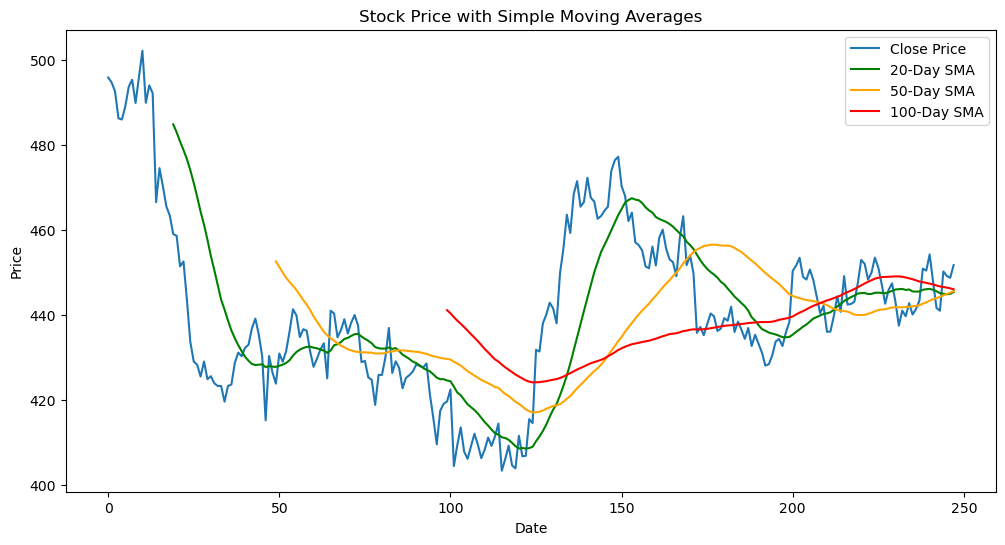

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='green')
plt.plot(df.index, df['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(df.index, df['SMA_100'], label='100-Day SMA', color='red')

plt.title('Stock Price with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
#The short-term SMA (20-day) is consistently above the longer-term SMAs (50-day and 100-day), indicaating a bullish trend in the market.
#The distance between the SMAs being narrowed,indicates a potential increase in volatility.

In [ ]:
#Calculating MACD (Moving Average Convergence Divergence)

In [40]:
# # Calculate the 12-day and 26-day EMAs
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line
df['MACD'] = df['EMA_12'] - df['EMA_26']
# Calculate the Signal line
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

# Display the first few rows to check
print(df[['MACD', 'Signal_Line', 'MACD_Histogram']].head())



       MACD  Signal_Line  MACD_Histogram
0  0.000000     0.000000        0.000000
1 -0.091738    -0.018348       -0.073390
2 -0.330088    -0.080696       -0.249393
3 -1.019621    -0.268481       -0.751140
4 -1.572165    -0.529218       -1.042948


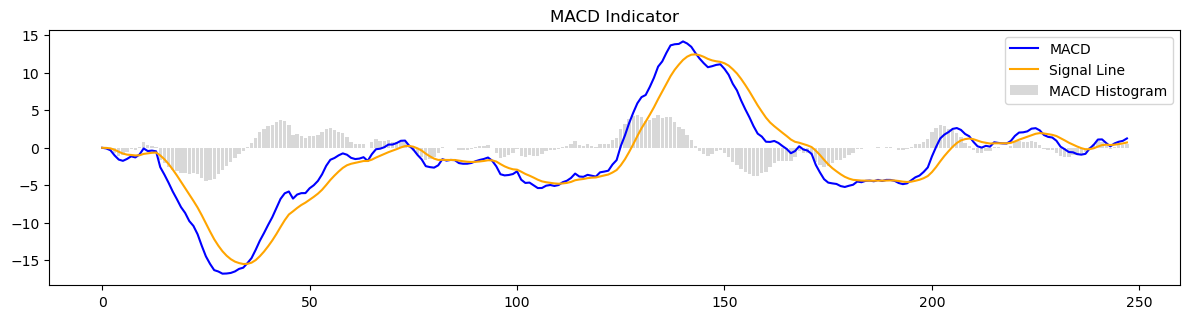

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal_Line'], label='Signal Line', color='orange')
plt.bar(df.index, df['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('MACD Indicator')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
# STOCK OPEN PRICE VS VWAP

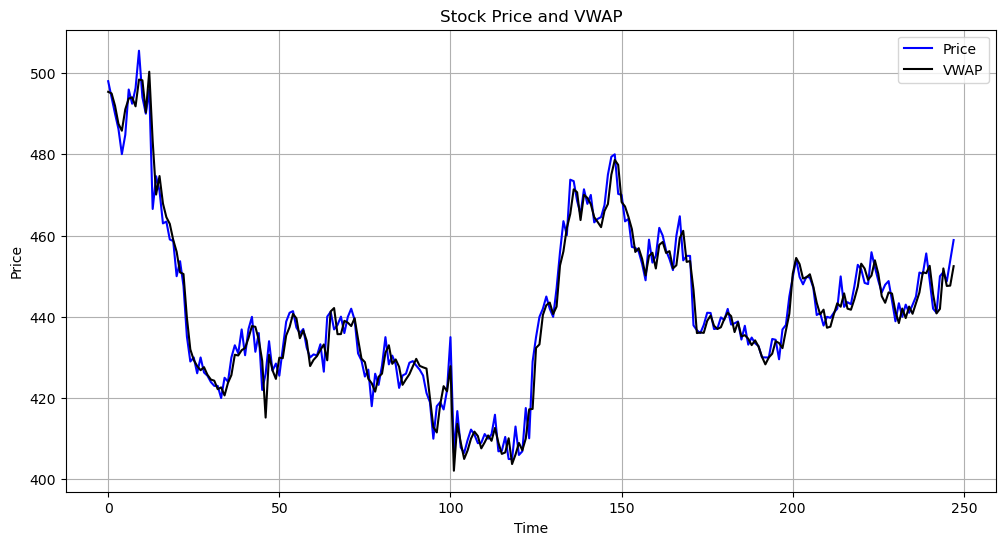

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['OPEN'], label='Price', color='blue')
plt.plot(df.index, df['vwap'], label='VWAP', color='black')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price and VWAP')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#With the blue line indicating the opening price being significantly higher than the volume weighted average price most of the times, the stock consistently out performs the market and indicates a bullish trend